# Análisis Exploratorio de Datos (EDA) para Grupo ABORDO

## Optimización de Beneficios y Reducción de Costes Energéticos

**Objetivo:** Este análisis busca identificar las familias y productos más rentables dentro del Grupo ABORDO para maximizar los beneficios. Además, se exploran estrategias para reducir los gastos operativos, con un enfoque particular en el ***consumo eléctrico de los congeladores industriales*** en el almacén central de Paiporta, dada la expectativa de un aumento en el precio de la luz.

### El [archivo](https://docs.google.com/spreadsheets/d/14GbC2OLXKUkejRVIfvkAKwYINALSF7pO/edit?usp=sharing&ouid=106728123074278087798&rtpof=true&sd=true) contiene información organizada en 2040 registros con las siguientes variables:


* __Familia:__ Código numérico que agrupa productos en grandes categorías, como "VERDURAS". 

* __Grupo Exp.:__	Código del grupo de productos, probablemente con fines comerciales o logísticos.

* __(Descripción del Grupo):__	Nombre del grupo, que describe el tipo o formato del producto (e.g., "MONOPRODUCTO - Formato Horeca").

* __Artículo:__	Código numérico del producto específico.

* __Descripción del Artículo:__	Nombre detallado del producto (e.g., "CEBOLLA TROC. 10x10 B/1KG").

* __Tipo Venta:__	Unidad de venta del producto (por ejemplo, "UND" para unidad).

### Importar librerias necesarias:

In [2]:
import pandas as pd 
import numpy as np 
from pathlib import Path 
import plotly.express as px 
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
import seaborn as sns

### Limpieza y preparación del DataFrame:




In [3]:
abordo = pd.read_excel("../data/raw/ABORDO.xlsx")
nuevas_columnas = abordo.iloc[0].tolist()
abordo = abordo[1:]
abordo.columns = nuevas_columnas
abordo = abordo.iloc[:,1:]


# Renombrar las columnas para mayor claridad
abordo.columns = ['Num_Familia', 'Familia', 'Num_Grupo', 'Grupo', 'ID', 'Producto', 'Formato_Venta']

# Añadir columnas de coste y precio de venta con valores simulados para demostración
import numpy as np

# Supongamos que el coste es un valor aleatorio entre 0.5 y 15 euros
np.random.seed(287)

abordo['Coste (€)'] = np.round(np.random.uniform(0.5, 15.0, size=len(abordo)), 2)

# El precio base es el coste más el margen mínimo
margen_minimo = 3.5
precio_base = abordo['Coste (€)'] + margen_minimo

abordo['Precio de venta (€)'] = np.round(precio_base * np.random.randint(1.1,5.0, size=len(abordo)), 2)

# Eliminamos la columna Num_Familia y Num_Grupo
abordo = abordo.iloc[:,1:]
del abordo['Num_Grupo']



abordo.head(10)

,Familia,Grupo,ID,Producto,Formato_Venta,Coste (€),Precio de venta (€)
1,VERDURAS,MEZCLAS 400 gr (Formato pequeño tienda),309,CN-ENSALADILLA RUSA B/400GR (LG),UND,2.60,24.40
2,VERDURAS,MEZCLAS 400 gr (Formato pequeño tienda),810,VERDURA PAELLA B/400GR,UND,10.81,28.62
3,VERDURAS,MONOPRODUCTO - Formato Horeca,8051,CEBOLLA TROC. 10x10 B/1KG,UND,13.20,16.70
4,VERDURAS,MONOPRODUCTO - Formato Horeca,8057,CN-MEZCLA SOFRITO 1KG,UND,11.68,60.72
5,VERDURAS,MONOPRODUCTO - Formato Horeca,8019,GUISANTES EXTRA FINOS 1 KG,UND,3.71,21.63
6,VERDURAS,MONOPRODUCTO - Formato Horeca,8020,GARROFON PRECOCIDO 1 KG,UND,0.76,12.78
7,VERDURAS,MONOPRODUCTO - Formato Horeca,8022,HABAS BABY B/1 KG-(NCNAL),UND,14.35,35.70
8,VERDURAS,MONOPRODUCTO - Formato Horeca,8024,JUDIA-VERDE PLANA 1 KG,UND,0.98,17.92
9,VERDURAS,MONOPRODUCTO - Formato Horeca,8025,JUDIA VERDE RED-TROCEADA 1 KG,UND,12.65,48.45
10,VERDURAS,MONOPRODUCTO - Formato Horeca,8026,JUDIA MUY FINA ENTERA B/1KG,UND,12.02,62.08


#### Tipos de Datos:
Asegurarse de que Costo (€) y Precio de venta (€) sean numéricos (float/int).
Convertir Formato_Venta a tipo categórico si tiene pocos valores únicos.

In [4]:
abordo.describe()

,Coste (€),Precio de venta (€)
count,2039.000000,2039.000000
mean,7.844169,28.770574
std,4.132797,17.131456
min,0.500000,4.010000
25%,4.220000,14.735000
50%,8.000000,25.000000
75%,11.405000,39.525000
max,14.990000,73.560000



#### Duplicados:
Identificar y manejar filas duplicadas.


In [5]:
abordo.duplicated().sum()
abordo.drop_duplicates()

,Familia,Grupo,ID,Producto,Formato_Venta,Coste (€),Precio de venta (€)
1,VERDURAS,MEZCLAS 400 gr (Formato pequeño tienda),309,CN-ENSALADILLA RUSA B/400GR (LG),UND,2.60,24.40
2,VERDURAS,MEZCLAS 400 gr (Formato pequeño tienda),810,VERDURA PAELLA B/400GR,UND,10.81,28.62
3,VERDURAS,MONOPRODUCTO - Formato Horeca,8051,CEBOLLA TROC. 10x10 B/1KG,UND,13.20,16.70
4,VERDURAS,MONOPRODUCTO - Formato Horeca,8057,CN-MEZCLA SOFRITO 1KG,UND,11.68,60.72
5,VERDURAS,MONOPRODUCTO - Formato Horeca,8019,GUISANTES EXTRA FINOS 1 KG,UND,3.71,21.63
...,...,...,...,...,...,...,...
2035,POSTRES,Repostería,841,PSTR-TARTA QUESO ESTILO VASCO 1600GR 14P,UND,6.66,10.16
2036,POSTRES,Churros y Porras,319,BLL-CHURROS LAZO- B/500GR,UND,8.78,24.56
2037,POSTRES,Churros y Porras,318,BLL-CHURROS LAZO-B/400GR,UND,11.23,44.19
2038,POSTRES,Churros y Porras,310,BLL-CHURROS AZUCARADOS GOURMET(GRANEL),KG,10.84,43.02


### Análisis Descriptivo Univariado:

#### Variables Categóricas (Familia, Grupo, Formato_Venta):



In [6]:
print(abordo.loc[:,"Familia"].value_counts())
conteo_familias = abordo['Familia'].value_counts().reset_index()
conteo_familias.columns = ['Familia', 'count'] 
conteo_familias_ordenado = conteo_familias.sort_values(by='count', ascending=True) 

hist1 = px.histogram(conteo_familias_ordenado,
                        x="count",
                        y="Familia",
                        nbins=15,  
                        title="Familias",
                        width=None,
                        height=None,
                        orientation='h',
                        labels={'Familia': 'Familia', 'count': 'Cantidad'}
                        )


hist1.show()

Familia
PRODUCTOS AMBIENTE                    861
PESCADOS ULTRACONGELADOS              264
REFRIGERADOS                          184
MARISCOS                              146
HORNO BOLLERÍA Y PANADERÍA             95
CARNES Y EMBUTIDOS ULTRACONGELADOS     94
PRECOCINADOS                           93
HELADOS                                74
VERDURAS                               70
PLATOS PREPARADOS                      40
PIZZAS Y PASTAS                        36
MOLUSCOS                               29
POSTRES                                25
ENTRANTES Y PRIMEROS                   24
SALAZONES                               4
Name: count, dtype: int64


In [7]:
print(abordo.loc[:,"Grupo"].value_counts())
px.histogram(abordo,
            y="Grupo",
            nbins=15,
            )

Grupo
A - Condiment - ESP- Carmencita          72
A - BLL - Bollería Industrial            51
Salazones                                44
Bollería - Pasteles Horno Artesano       35
Carnes - Cerdo y mixtas                  30
                                         ..
Cafés, Infusiones y Preparado Postres     1
A - Aceites - ACT - Girasol/Semillas      1
A - Galletas - Helado                     1
B - RF- Coca cola botella                 1
B - Refrescos - RF- Té                    1
Name: count, Length: 233, dtype: int64


In [8]:
print(abordo.loc[:,"Formato_Venta"].value_counts())



Formato_Venta
UND    1574
KG      464
kg        1
Name: count, dtype: int64


#### Variables Numéricas (Costo (€), Precio de venta (€)):



In [9]:
abordo.describe()

,Coste (€),Precio de venta (€)
count,2039.000000,2039.000000
mean,7.844169,28.770574
std,4.132797,17.131456
min,0.500000,4.010000
25%,4.220000,14.735000
50%,8.000000,25.000000
75%,11.405000,39.525000
max,14.990000,73.560000


<Axes: xlabel='Coste (€)', ylabel='Count'>

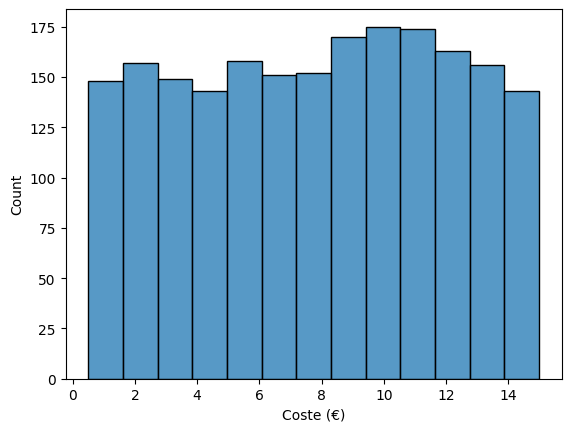

In [10]:
sns.histplot(abordo.loc[:,"Coste (€)"])

<Axes: xlabel='Precio de venta (€)', ylabel='Count'>

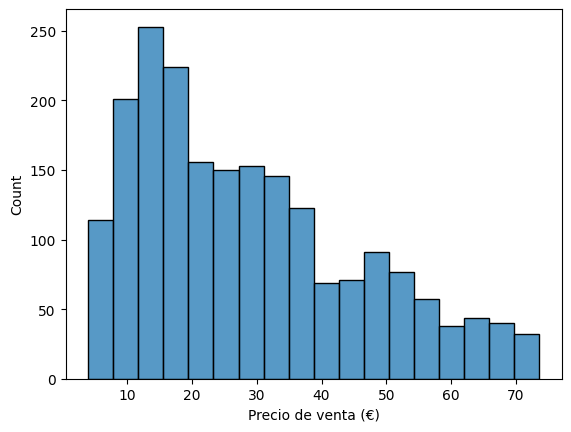

In [11]:
sns.histplot(abordo.loc[:,"Precio de venta (€)"])

 ### Gráficas Bidimensionales (Análisis de relaciones entre variables):

#### Frecuencia por Grupo

In [12]:
frecuencia_grupo = abordo['Grupo'].value_counts().head(15).reset_index()
frecuencia_grupo.columns = ['Grupo', 'Frecuencia']
fig = px.bar(frecuencia_grupo,
            x='Grupo',
            y='Frecuencia',
            title='Frecuencia por Grupo')
fig.update_layout(xaxis_title="Grupo", yaxis_title="Frecuencia")
fig.update_layout(xaxis_tickangle=-45)
fig.show()

#### Productos más caros (según Precio de venta)

In [13]:

top_n = abordo.nlargest(5, 'Precio de venta (€)')
fig = px.bar(top_n, x='Precio de venta (€)', y='Producto', orientation='h',
            title='Top 5 Productos por Precio de Venta',
            color='Precio de venta (€)', 
            color_continuous_scale=px.colors.sequential.Viridis) 
fig.show()

#### Distribución de Formato de Venta

In [14]:


frecuencia_formato = abordo['Formato_Venta'].value_counts().reset_index()
frecuencia_formato.columns = ['Formato', 'Frecuencia']
fig = px.bar(frecuencia_formato, x='Formato', y='Frecuencia',
            title='Distribución de Formato de Venta')
fig.update_layout(xaxis_title="Formato", yaxis_title="Frecuencia")
fig.show()

#### Distribución de Coste y Precio de Venta:

In [15]:
fig = px.histogram(abordo, x=['Coste (€)', 'Precio de venta (€)'],
                barmode='overlay', 
                nbins=200, 
                opacity=0.6,
                title='Distribución de Coste y Precio de Venta')
fig.update_layout(xaxis_title="€", yaxis_title="Frecuencia")
fig.show()

In [16]:
#Obtener los 10 productos con el coste más alto
top_10_coste = abordo.nlargest(10, 'Coste (€)')


fig = px.scatter(top_10_coste, 
                x='Coste (€)',
                y='Precio de venta (€)',
                title='Contraste entre Coste y Precio de Venta (Top 10 Productos con Coste más Alto)',
                hover_data=['Producto', 'Familia', 'Grupo'],
                color='Grupo',
                size='Precio de venta (€)')

#Añadir la línea diagonal

max_val = max(top_10_coste['Coste (€)'].max(), top_10_coste['Precio de venta (€)'].max())
max_val_plot = max_val * 1.05

fig.add_shape(type="line",
            x0=0, y0=0, x1=max_val_plot, y1=max_val_plot,
            line=dict(color="Red", width=2, dash="dash"),
            name='Coste = Precio Venta')

fig.update_layout(xaxis_title="Coste (€)",
                yaxis_title="Precio de venta (€)",
                showlegend=True)
fig.show()




#### Margen Bruto (€) por Grupo y Producto: 



In [17]:
abordo.loc[:,"Margen Beneficio (€)"] = abordo.loc[:,"Precio de venta (€)"] - abordo.loc[:,"Coste (€)"]

abordo_ord = abordo.sort_values(by="Producto", ascending=False)
top_15_producto = abordo_ord.head(15)

scater_grupo = px.scatter(abordo,
                    x="Margen Beneficio (€)",
                    y="Grupo")
hist_margen = px.histogram(top_15_producto,
                        x="Margen Beneficio (€)",
                        y="Producto")
scater_producto = px.scatter(abordo,
                            x= "Margen Beneficio (€)",
                            y="Producto")
scater_grupo.show()
scater_producto.show()
hist_margen.show()

### Comparación de Costes y Precios por Grupo y Producto:
Gráfico de Barras Agrupadas o Gráfico de Barras Apiladas: Comparar el coste y el precio de venta para cada Grupo o Producto para visualizar directamente la diferencia (margen).

In [18]:
abordo.loc[:,"% Beneficio"] = np.round(abordo.loc[:,"Margen Beneficio (€)"] / abordo.loc[:,"Coste (€)"],1) * 100


abordo_ordenado = abordo.sort_values(by="% Beneficio", ascending=False)
top_15_grupo = abordo_ordenado.head(15)

hist2= px.histogram(abordo,
                    x="% Beneficio")
                    
bar_grupo = px.bar(top_15_grupo,
            x= "% Beneficio",
            y="Producto",
            title='Top 15 Grupos por % Beneficio')
bar_producto = px.bar(top_15_grupo,
                        x="% Beneficio",
                        y="Grupo",
                        title='Top 15 Productos por % Beneficio')

bar_producto.show()
bar_grupo.show()
hist2.show()

In [32]:
abordo.loc[:,"Ratio Precio/Costo"] = abordo.loc[:,"Precio de venta (€)"] / abordo.loc[:,"Coste (€)"] 
abordo.loc[:,"Ratio Precio/Costo"]


1       9.384615
2       2.647549
3       1.265152
4       5.198630
5       5.830189
          ...   
2035    1.525526
2036    2.797267
2037    3.934996
2038    3.968635
2039    1.241213
Name: Ratio Precio/Costo, Length: 2039, dtype: float64

In [20]:

beneficio_por_grupo = abordo.groupby('Grupo')['Margen Beneficio (€)'].sum().sort_values(ascending=False)

beneficio_df = beneficio_por_grupo.reset_index()
beneficio_df.columns = ['Grupo', 'Suma Margen Beneficio (€)']


# Mostrar los 15 primeros por suma de margen para una mejor visualización de los líderes.
top_beneficio_df = beneficio_df.head(10)

fig1 = px.bar(top_beneficio_df,
            x='Grupo',
            y='Suma Margen Beneficio (€)',
            title='Suma del Margen de Beneficio (€) por Grupo (Top 10 por beneficio)',
            labels={'Suma Margen Beneficio (€)': 'Suma del Margen de Beneficio (€)'})
fig1.update_layout(xaxis_tickangle=-45) # Rotar etiquetas del eje X para mejor legibilidad
fig1.show()

### DataFrame sobre el precio de la luz según la tarifa contratada, en la zona donde se encuentra el almacen central:

In [21]:


data_coste_luz = {
    'Fecha': pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
                                '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
                                '2024-11-01', '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01',
                                '2025-04-01', '2025-05-01']), # Fechas de inicio de mes
    'Coste Total (€)': [5000, 5300, 6100, 5800, 6200, 6500, 6800, 6600, 6700, 6700, 6400, 6750,
                        7500, 7200, 7400, 8000, 8100] # Coste total de la factura mensual
}

df_coste_luz = pd.DataFrame(data_coste_luz)


fig = px.line(df_coste_luz,
            x='Fecha',          
            y='Coste Total (€)', 
            title='Coste Mensual de la Energía Eléctrica (Tarifa 6.1TD) en Paiporta en los Últimos 14 meses',
            labels={'Fecha': 'Mes', 'Coste Total (€)': 'Coste Total (€)'},
            markers=True,       
            line_shape='linear', 
            color_discrete_sequence=["#E68027"] 
            )


fig.update_layout(
    plot_bgcolor='white',        
    paper_bgcolor='white',       
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="#4C87AF"
    ),
    title_x=0.5,
    hovermode="x unified" 
)

fig.update_xaxes(
    showgrid=True,               
    gridcolor='lightgray',      
    tickformat="%Y-%m",          # Formato de las etiquetas del eje X (Año-Mes)
    dtick="M1",                  # Mostrar ticks cada mes
    rangeslider_visible=False,   
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_yaxes(
    showgrid=True,               
    gridcolor='lightgray',      
    tickprefix="€",              
    rangemode="tozero"           
)


fig.show()

DATOS Gastos elec. Instalaciones

In [22]:
df_congeladores = pd.DataFrame({
    "Tipo de Congelador Industrial": ["Cámara Frigorífica Grandes Superficies"],
    "Capacidad": ["50 - 200+ m³"],
    "Consumo Estimado": ["150 - 500+ kWh/día"],
    "Consideraciones": ["Almacenes centrales, centros logísticos"]
})

df_congeladores

,Tipo de Congelador Industrial,Capacidad,Consumo Estimado,Consideraciones
0,Cámara Frigorífica Grandes Superficies,50 - 200+ m³,150 - 500+ kWh/día,"Almacenes centrales, centros logísticos"


### Calculos atendiendo a la hipótesis:


In [23]:
productos_ambiente_df = abordo[abordo['Familia'] == 'PRODUCTOS AMBIENTE'].copy()

print("DataFrame con productos de la familia 'PRODUCTOS AMBIENTE':")
print(productos_ambiente_df)

# Comprobamos que pese a ser una gran fuente de ingresos para la empresa, los "productos ambiente" no forman parte del conflicto puesto que no necesitan de refrigeración para su almacenaje.


conteo_familias = abordo['Familia'].value_counts().reset_index()
conteo_familias.columns = ['Familia', 'count']
conteo_familias_ordenado = conteo_familias.sort_values(by='count', ascending=True)

conteo_familias_sin_ambiente = conteo_familias_ordenado[conteo_familias_ordenado['Familia'] != 'PRODUCTOS AMBIENTE']

print("\nTabla de familias (excluyendo 'PRODUCTOS AMBIENTE'), ordenada por cantidad:")
print(conteo_familias_sin_ambiente)

hist1_sin_ambiente = px.histogram(conteo_familias_sin_ambiente,
                                x="count",
                                y="Familia",
                                nbins=15,
                                title="Familias (Excluyendo Productos Ambiente)",
                                width=None,
                                height=None,
                                orientation='h',
                                labels={'Familia': 'Familia', 'count': 'Cantidad'})

hist1_sin_ambiente.show()


DataFrame con productos de la familia 'PRODUCTOS AMBIENTE':
                 Familia                              Grupo    ID  \
1065  PRODUCTOS AMBIENTE             Precocinados del Mundo  1526   
1066  PRODUCTOS AMBIENTE  Pan Tostado y Bollería Industrial  1825   
1067  PRODUCTOS AMBIENTE  Pan Tostado y Bollería Industrial  1832   
1068  PRODUCTOS AMBIENTE  Pan Tostado y Bollería Industrial  1834   
1069  PRODUCTOS AMBIENTE  Pan Tostado y Bollería Industrial  5620   
...                  ...                                ...   ...   
1921  PRODUCTOS AMBIENTE               A - Cafés - Cápsulas  9053   
1922  PRODUCTOS AMBIENTE               A - Cafés - Cápsulas  9377   
1923  PRODUCTOS AMBIENTE               A - Cafés - Cápsulas  5062   
1924  PRODUCTOS AMBIENTE               A - Cafés - Cápsulas  5027   
1925  PRODUCTOS AMBIENTE               A - Cafés - Cápsulas  3462   

                                    Producto Formato_Venta  Coste (€)  \
1065          HR-ROLLITO DE NARANJA E/

In [24]:
top_8_familias_restantes = conteo_familias_sin_ambiente.sort_values(by='count', ascending=False).head(8)

hist_top8_familias = px.bar(top_8_familias_restantes,
                            x="count",
                            y="Familia",
                            title="Top 8 Familias Más Incidentes (Excluyendo Productos Ambiente)",
                            orientation='h', # Horizontal bars for better readability
                            labels={'Familia': 'Familia de Producto', 'count': 'Cantidad de Incidencias'},
                            color_discrete_sequence=px.colors.qualitative.Plotly)


hist_top8_familias.update_yaxes(categoryorder='total ascending')
hist_top8_familias.update_layout(title_x=0.5) 

hist_top8_familias.show()

In [25]:
productos_ambiente_df = abordo[abordo['Familia'] == 'PRODUCTOS AMBIENTE']
suma_precios_venta_productos_ambiente = productos_ambiente_df['Precio de venta (€)'].sum()

suma_precios_venta_productos_ambiente

np.float64(24637.11)

#### Los productos de la familia "Productos Ambiente" los cuales no necesitan de refrigeración, suponen un **42%** del total de ingresos mensuales de la empresa.

In [26]:
top_8_familias_df = conteo_familias_sin_ambiente.sort_values(by='count', ascending=False).head(8)
top_8_familias_list = top_8_familias_df['Familia'].tolist()


productos_de_top_8_familias = abordo[abordo['Familia'].isin(top_8_familias_list)].copy()
total_precios_venta_top_8_familias = productos_de_top_8_familias['Precio de venta (€)'].sum()

print(f"Las 8 familias más incidentes son: {top_8_familias_list}")
print(f"La suma total de los 'Precio de venta (€)' de los productos de estas 8 familias es: {total_precios_venta_top_8_familias:.2f} €")
print(f"Y el total facturado por abordo es de {abordo['Precio de venta (€)'].sum()}€, por lo que los productos que necesitan de conservación en un congelador industrial suponen un 50.54% del beneficio mensaul de la empresa")

Las 8 familias más incidentes son: ['PESCADOS ULTRACONGELADOS', 'REFRIGERADOS', 'MARISCOS', 'HORNO BOLLERÍA Y PANADERÍA', 'CARNES Y EMBUTIDOS ULTRACONGELADOS', 'PRECOCINADOS', 'HELADOS', 'VERDURAS']
La suma total de los 'Precio de venta (€)' de los productos de estas 8 familias es: 29649.21 €
Y el total facturado por abordo es de 58663.2€, por lo que los productos que necesitan de conservación en un congelador industrial suponen un 50.54% del beneficio mensaul de la empresa


### Parámetros de Entrada

In [27]:

superficie_techo_m2 = 250  
porcentaje_util_techo = 0.8  # Porcentaje del techo que se puede usar para paneles (80%)
watios_pico_por_m2 = 200  # Wp/m² (eficiencia estimada de los paneles)
consumo_diario_camara_kwh = 300  # kWh/día 
horas_sol_pico = 5  # Horas de Sol Pico Equivalentes (HSP) promedio diario en España

# Coste por kWp para paneles (instalados en cubierta)
coste_por_kwp_paneles_min = 900
coste_por_kwp_paneles_max = 1200
coste_medio_por_kwp_paneles = (coste_por_kwp_paneles_min + coste_por_kwp_paneles_max) / 2

# Otros costes de componentes y mano de obra (como porcentaje del coste de paneles o fijo)
porcentaje_coste_inversores = 0.20  # 20% del coste de paneles (aprox. 0.20€/Wp)
porcentaje_coste_estructura = 0.12  # 12% del coste de paneles (aprox. 0.12€/Wp)
porcentaje_coste_cableado_protecciones = 0.10  # 10% del coste de paneles (aprox. 0.10€/Wp)
porcentaje_coste_mano_obra = 0.20  # 20% del coste de paneles (aprox. 0.20€/Wp)
coste_fijo_ingenieria_licencias = 5000  # Coste fijo para permisos y proyectos

# Costes específicos de las baterías
capacidad_bateria_kwh = 50  # kWh para autonomía (~4-6 horas de alto consumo)
coste_por_kwh_bateria_min = 800
coste_por_kwh_bateria_max = 1200
coste_medio_por_kwh_bateria = (coste_por_kwh_bateria_min + coste_por_kwh_bateria_max) / 2

# Parámetros de la electricidad
precio_electricidad_por_kwh = 0.20  # €/kWh (precio promedio para el consumo industrial en España, con impuestos/cargos)
incremento_anual_precio_electricidad = 0.03  # 3% de incremento anual del precio de la electricidad
compensacion_excedentes_anual = 800  # Ingreso anual estimado por la venta de excedentes






### Cálculos 

In [28]:


# Dimensionamiento del Sistema
superficie_util_m2 = superficie_techo_m2 * porcentaje_util_techo
potencia_pico_watios = superficie_util_m2 * watios_pico_por_m2
potencia_pico_kwp = potencia_pico_watios / 1000

# Producción Estimada
produccion_diaria_solar_kwh = potencia_pico_kwp * horas_sol_pico
produccion_anual_solar_kwh = produccion_diaria_solar_kwh * 365

# Cálculo de Costes - Escenario A: Sin Baterías
coste_paneles_A = potencia_pico_kwp * coste_medio_por_kwp_paneles
coste_inversores_A = coste_paneles_A * porcentaje_coste_inversores
coste_estructura_A = coste_paneles_A * porcentaje_coste_estructura
coste_cableado_A = coste_paneles_A * porcentaje_coste_cableado_protecciones
coste_mano_obra_A = coste_paneles_A * porcentaje_coste_mano_obra
coste_ingenieria_A = coste_fijo_ingenieria_licencias

coste_total_A = sum([coste_paneles_A, coste_inversores_A, coste_estructura_A,
                    coste_cableado_A, coste_mano_obra_A, coste_ingenieria_A])

# Cálculo de Costes - Escenario B: Con Baterías
coste_baterias_B = capacidad_bateria_kwh * coste_medio_por_kwh_bateria
coste_total_B = coste_total_A + coste_baterias_B

# Ahorro Anual
ahorro_anual_electricidad = produccion_anual_solar_kwh * precio_electricidad_por_kwh
ahorro_anual_total_A = ahorro_anual_electricidad + compensacion_excedentes_anual

# Para el escenario con baterías, asumimos un ahorro efectivo ligeramente superior por el máximo autoconsumo
ahorro_anual_total_B = ahorro_anual_total_A * 1.05 # 5% más de ahorro por mayor autoconsumo

# Periodo de Amortización
amortizacion_A = coste_total_A / ahorro_anual_total_A
amortizacion_B = coste_total_B / ahorro_anual_total_B

### Datos para Gráficas

In [29]:

# Datos para Desglose de Costes
desglose_costes_A = {
    'Componente': ['Paneles Solares', 'Inversores', 'Estructura', 'Cableado y Protecciones', 'Mano de Obra', 'Ingeniería y Licencias'],
    'Coste (€)': [coste_paneles_A, coste_inversores_A, coste_estructura_A, coste_cableado_A, coste_mano_obra_A, coste_ingenieria_A]
}
df_desglose_A = pd.DataFrame(desglose_costes_A)

desglose_costes_B = desglose_costes_A.copy()
desglose_costes_B['Componente'].append('Baterías')
desglose_costes_B['Coste (€)'].append(coste_baterias_B)
df_desglose_B = pd.DataFrame(desglose_costes_B)

# Datos para Gráfica de Amortización
# Extendemos unos años más allá de la amortización para mejor visualización
anios = list(range(int(max(amortizacion_A, amortizacion_B)) + 3 + 1))
ahorros_acumulados_A = []
ahorros_acumulados_B = []

coste_inicial_A_lista = [coste_total_A] * len(anios)
coste_inicial_B_lista = [coste_total_B] * len(anios)

ahorro_acumulado_temp_A = 0
ahorro_acumulado_temp_B = 0
for i in anios:
    if i == 0:
        ahorros_acumulados_A.append(0)
        ahorros_acumulados_B.append(0)
    else:
        ahorro_anual_actual_A = ahorro_anual_total_A * ((1 + incremento_anual_precio_electricidad)**(i-1))
        ahorro_acumulado_temp_A += ahorro_anual_actual_A
        ahorros_acumulados_A.append(ahorro_acumulado_temp_A)

        ahorro_anual_actual_B = ahorro_anual_total_B * ((1 + incremento_anual_precio_electricidad)**(i-1))
        ahorro_acumulado_temp_B += ahorro_anual_actual_B
        ahorros_acumulados_B.append(ahorro_acumulado_temp_B)


df_amortizacion = pd.DataFrame({
    'Año': anios,
    'Ahorro Acumulado (Sin Baterías)': ahorros_acumulados_A,
    'Ahorro Acumulado (Con Baterías)': ahorros_acumulados_B,
    'Costo Inicial (Sin Baterías)': coste_inicial_A_lista,
    'Costo Inicial (Con Baterías)': coste_inicial_B_lista
})



### Impresión de Resultados 

In [33]:

print(f"Análisis del Sistema Solar para Almacén ({superficie_techo_m2} m² de techo)")
print(f"Superficie útil estimada para paneles: {superficie_util_m2:.2f} m²")
print(f"**Potencia pico instalable (Kilovatios pico, potencia máxima): {potencia_pico_kwp:.2f} kWp**")
print(f"Producción diaria estimada: {produccion_diaria_solar_kwh:.2f} kWh/día")
print(f"**Producción anual estimada: {produccion_anual_solar_kwh:,.2f} kWh/año**\n")

print(f"Consumo Diario de la Cámara Frigorífica: {consumo_diario_camara_kwh} kWh/día")
print(f"**Porcentaje de Consumo de Cámara Cubierto por Energía Solar: {min(100, (produccion_diaria_solar_kwh / consumo_diario_camara_kwh) * 100):.2f}%**\n")

print("ESCENARIO A: Instalación SIN BATERÍAS")
print(f"  Coste de Paneles: {coste_paneles_A:,.2f} €")
print(f"  Coste de Inversores: {coste_inversores_A:,.2f} €")
print(f"  Coste de Estructura: {coste_estructura_A:,.2f} €")
print(f"  Coste de Cableado y Protecciones: {coste_cableado_A:,.2f} €")
print(f"  Coste de Mano de Obra: {coste_mano_obra_A:,.2f} €")
print(f"  Coste de Ingeniería y Licencias: {coste_ingenieria_A:,.2f} €")
print(f"**Coste Total Estimado (Sin Baterías): {coste_total_A:,.2f} €**")
print(f"**Ahorro Anual Estimado (Sin Baterías): {ahorro_anual_total_A:,.2f} €**")
print(f"**Tiempo de Amortización (Sin Baterías): {amortizacion_A:.2f} años**\n")

print("ESCENARIO B: Instalación CON BATERÍAS")
print(f"  Coste de Paneles: {coste_paneles_A:,.2f} €")
print(f"  Coste de Inversores: {coste_inversores_A:,.2f} €")
print(f"  Coste de Estructura: {coste_estructura_A:,.2f} €")
print(f"  Coste de Cableado y Protecciones: {coste_cableado_A:,.2f} €")
print(f"  Coste de Mano de Obra: {coste_mano_obra_A:,.2f} €")
print(f"  Coste de Ingeniería y Licencias: {coste_ingenieria_A:,.2f} €")
print(f"  Coste de Baterías ({capacidad_bateria_kwh} kWh): {coste_baterias_B:,.2f} €")
print(f"**Coste Total Estimado (Con Baterías): {coste_total_B:,.2f} €**")
print(f"**Ahorro Anual Estimado (Con Baterías, mayor autoconsumo): {ahorro_anual_total_B:,.2f} €**")
print(f"**Tiempo de Amortización (Con Baterías): {amortizacion_B:.2f} años**\n")

Análisis del Sistema Solar para Almacén (250 m² de techo)
Superficie útil estimada para paneles: 200.00 m²
**Potencia pico instalable (Kilovatios pico, potencia máxima): 40.00 kWp**
Producción diaria estimada: 200.00 kWh/día
**Producción anual estimada: 73,000.00 kWh/año**

Consumo Diario de la Cámara Frigorífica: 300 kWh/día
**Porcentaje de Consumo de Cámara Cubierto por Energía Solar: 66.67%**

ESCENARIO A: Instalación SIN BATERÍAS
  Coste de Paneles: 42,000.00 €
  Coste de Inversores: 8,400.00 €
  Coste de Estructura: 5,040.00 €
  Coste de Cableado y Protecciones: 4,200.00 €
  Coste de Mano de Obra: 8,400.00 €
  Coste de Ingeniería y Licencias: 5,000.00 €
**Coste Total Estimado (Sin Baterías): 73,040.00 €**
**Ahorro Anual Estimado (Sin Baterías): 15,400.00 €**
**Tiempo de Amortización (Sin Baterías): 4.74 años**

ESCENARIO B: Instalación CON BATERÍAS
  Coste de Paneles: 42,000.00 €
  Coste de Inversores: 8,400.00 €
  Coste de Estructura: 5,040.00 €
  Coste de Cableado y Protecciones

### Generación de Gráficas con Plotly Express

In [31]:

# Gráfica 1: Desglose de Costes Sin Baterías
fig_coste_A = px.pie(df_desglose_A, values='Coste (€)', names='Componente',
                    title='Desglose de Costes de la Instalación sin Baterías (Estimado: 73,040 €):',
                    hole=0.3)
fig_coste_A.update_traces(textposition='inside', textinfo='percent+label')
fig_coste_A.show()

# Gráfica 2: Desglose de Costes Con Baterías
fig_coste_B = px.pie(df_desglose_B, values='Coste (€)', names='Componente',
                    title='Desglose de Costes de la Instalación con Baterías (Estimado: 123,040 €):',
                    hole=0.3)
fig_coste_B.update_traces(textposition='inside', textinfo='percent+label')
fig_coste_B.show()

# Gráfica 3: Línea de Tiempo de Amortización
fig_amortizacion = go.Figure()

# Escenario A
fig_amortizacion.add_trace(go.Scatter(x=df_amortizacion['Año'], y=df_amortizacion['Ahorro Acumulado (Sin Baterías)'],
                                        mode='lines', name='Ahorro Acumulado (Sin Baterías)',
                                        line=dict(color='green', width=2)))
fig_amortizacion.add_trace(go.Scatter(x=df_amortizacion['Año'], y=df_amortizacion['Costo Inicial (Sin Baterías)'],
                                        mode='lines', name='Costo Inicial (Sin Baterías)',
                                        line=dict(color='red', dash='dash', width=2)))

# Escenario B
fig_amortizacion.add_trace(go.Scatter(x=df_amortizacion['Año'], y=df_amortizacion['Ahorro Acumulado (Con Baterías)'],
                                        mode='lines', name='Ahorro Acumulado (Con Baterías)',
                                        line=dict(color='blue', width=2)))
fig_amortizacion.add_trace(go.Scatter(x=df_amortizacion['Año'], y=df_amortizacion['Costo Inicial (Con Baterías)'],
                                        mode='lines', name='Costo Inicial (Con Baterías)',
                                        line=dict(color='orange', dash='dash', width=2)))

# Añadir puntos y anotaciones de amortización
# Anotación para Escenario A
fig_amortizacion.add_annotation(
    x=amortizacion_A,
    y=coste_total_A,
    text=f'Amort. Sin Baterías: {amortizacion_A:.1f} años',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(color="green")
)
fig_amortizacion.add_trace(go.Scatter(x=[amortizacion_A], y=[coste_total_A],
                                        mode='markers', name='Punto Amort. Sin Baterías',
                                        marker=dict(color='green', size=10)))

# Anotación para Escenario B
fig_amortizacion.add_annotation(
    x=amortizacion_B,
    y=coste_total_B,
    text=f'Amort. Con Baterías: {amortizacion_B:.1f} años',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=40,
    font=dict(color="blue")
)
fig_amortizacion.add_trace(go.Scatter(x=[amortizacion_B], y=[coste_total_B],
                                        mode='markers', name='Punto Amort. Con Baterías',
                                        marker=dict(color='blue', size=10)))


fig_amortizacion.update_layout(
    title='Línea de Tiempo de Amortización de la Inversión Solar',
    xaxis_title='Año',
    yaxis_title='Coste/Ahorro Acumulado (€)',
    hovermode='x unified',
    template='plotly_white'
)
fig_amortizacion.show()

##### La suma total de los 'Precio de venta (€)' de los productos de estas 8 familias es: ***29649.21€.***
##### El total facturado por abordo es de ***58663.2€***, por lo que los productos que necesitan de conservación en un congelador industrial suponen un **50.54%** del beneficio mensual de la empresa.

# Conclusiones:



Basado en el análisis de beneficios y la consideración del consumo energético, se proponen las siguientes recomendaciones:

En vista de los resultados, si ahorrasemos todo el dinero invertido en cualquier familia de productos que no sea de las 9 con más % de Beneficios y ese mismo dinero se invirtiera en comprar los productos más rentables de la familia "Productos Ambiente", habría ganáncias, pero insignificantes frente al problema con el precio del consumo eléctico.
 Se podría plantear una reducción de Gastos Energéticos (Congeladores):

* **Tecnología y Eficiencia:** Evaluar la inversión en nuevos equipos de mayor eficiencia energética (clasificación A+++/A++) para reemplazar a los más antiguos y menos eficientes, especialmente los de mayor consumo. Aunque la inversión inicial es alta, el retorno en ahorro energético puede ser significativo.
* **Análisis Tarifario:** Revisar periódicamente el contrato de la tarifa 6.1TD con el proveedor de energía para asegurar que se ajusta a los patrones de consumo de la empresa y buscar optimizaciones (potencia contratada, tarifas indexadas, etc.).



La opción más viable es la siguiente:

La instalación de placas solares con baterías en el almacén central de ABORDO, con una potencia de 40 kWp y capacidad de 50 kWh de batería, representa la inversión más inteligente y robusta. Aunque el coste inicial estimado de 120.000€ es superior al sistema sin baterías, su amortización en aproximadamente 7.5 años ofrece un retorno de inversión muy atractivo.

Esta opción no solo permitirá ahorrar significativamente en la factura eléctrica (gracias a una producción anual de 73.000 kWh que cubre el 66.67% del consumo de la cámara), sino que también proporcionará independencia energética y seguridad crítica para la cámara frigorífica ante posibles cortes de suministro. Las baterías maximizan el autoconsumo, asegurando que la energía generada de día se aproveche también de noche, optimizando el ahorro y la operatividad constante de la cámara.

Considerando las subvenciones disponibles en España para el autoconsumo industrial y el almacenamiento, el periodo de amortización real podría reducirse considerablemente, haciendo esta inversión aún más rentable y estratégica para la sostenibilidad y resiliencia del negocio.